In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split,ShuffleSplit,cross_validate, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, learning_curve

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score

In [ ]:
# for plotting
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Radiant Future Dataset.csv')
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [ ]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


In [ ]:
print(f"""                           < Summary Statistics: >

{df.describe()}


Target Variable:
{df["PolyPwr"].describe()}


Shape of DataFrame:    {df.shape}""")

                           < Summary Statistics: >

               Date          Time      Latitude     Longitude      Altitude  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017720e+07   1267.483725     38.213823   -108.593678    798.843668   
std    4.579585e+03    167.602767      6.323761     16.364130    770.681794   
min    2.017052e+07   1000.000000     20.890000   -156.440000      1.000000   
25%    2.017111e+07   1100.000000     38.160000   -117.260000      2.000000   
50%    2.018032e+07   1300.000000     38.950000   -111.180000    458.000000   
75%    2.018062e+07   1400.000000     41.150000   -104.710000   1370.000000   
max    2.018100e+07   1545.000000     47.520000    -80.110000   1947.000000   

         YRMODAHRMI         Month          Hour      Humidity   AmbientTemp  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017718e+11      6.565883     12.627845     37.121941     29.285117   

In [ ]:
#drop location column
df.drop(['Location', 'Date', 'Time', 'YRMODAHRMI', 'Hour','Month'], axis=1, inplace=True)

In [ ]:
y = df.loc[:,'PolyPwr']
X = df.drop(labels = 'PolyPwr', axis=1)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"test: {X_test.shape}")
print(f"train: {X_train.shape}")

test: (4209, 10)
train: (16836, 10)


In [ ]:
dum_season = pd.get_dummies(X_train.loc[:,'Season'], dtype='int64')
X_train = pd.concat((X_train,dum_season), axis = 1)
X_train.drop('Season', axis=1,inplace=True)

In [ ]:
# Perform the same one-hot encoding for X_test
dum_season = pd.get_dummies(X_test.loc[:,'Season'], dtype='int64')
X_test = pd.concat((X_test,dum_season), axis = 1)
X_test.drop('Season', axis=1,inplace=True)


In [ ]:
X_train.head()

,Latitude,Longitude,Altitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
3048,41.15,-111.99,1370,14.83765,43.88474,0,10.0,858.4,722,1,0,0,0
16665,38.16,-121.56,1,92.02881,15.51529,10,10.0,1008.2,44,1,0,0,0
9792,33.90,-117.26,458,1.88599,38.12927,0,10.0,957.9,722,1,0,0,0
3753,41.15,-111.99,1370,30.07202,23.22952,0,0.3,859.6,722,0,0,0,1
7270,20.89,-156.44,2,65.22827,29.05045,10,10.0,1007.7,722,0,1,0,0


In [ ]:
columns= {}
for i in range(len(X_train.columns)):
     columns[i] = X_train.columns[i]
columns = pd.DataFrame.from_dict(columns,orient='index')
columns

,0
0,Latitude
1,Longitude
2,Altitude
3,Humidity
4,AmbientTemp
5,Wind.Speed
6,Visibility
7,Pressure
8,Cloud.Ceiling
9,Fall


In [ ]:
scaler = StandardScaler()


In [ ]:
shapes = f"X shape = {X.shape}, y shape =  {y.shape}, \n\
X_train shape = {X_train.shape} y_train shape = {y_train.shape} \n\
X_test shape = {X_test.shape}, y_test.shape = {y_test.shape}"
print(shapes)

X shape = (21045, 10), y shape =  (21045,), 
X_train shape = (16836, 13) y_train shape = (16836,) 
X_test shape = (4209, 13), y_test.shape = (4209,)


In [ ]:
X_train.describe()

,Latitude,Longitude,Altitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
count,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000
mean,38.243955,-108.583477,799.284094,37.093840,29.336361,10.299121,9.699644,925.913566,516.768354,0.209551,0.228083,0.390473,0.171894
std,6.327469,16.372180,771.720482,23.832564,12.367436,6.374193,1.347912,85.294259,301.514471,0.407000,0.419609,0.487871,0.377299
min,20.890000,-156.440000,1.000000,0.000000,-18.670040,0.000000,0.000000,782.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.160000,-117.260000,2.000000,17.456050,21.930390,6.000000,10.000000,844.225000,140.000000,0.000000,0.000000,0.000000,0.000000
50%,38.950000,-111.180000,458.000000,33.041380,30.296710,9.000000,10.000000,961.100000,722.000000,0.000000,0.000000,0.000000,0.000000
75%,41.150000,-104.710000,1370.000000,52.600100,37.482850,14.000000,10.000000,1008.900000,722.000000,0.000000,0.000000,1.000000,0.000000
max,47.520000,-80.110000,1947.000000,99.987790,64.502180,49.000000,10.000000,1029.500000,722.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train.describe()

,PolyPwr
count,16836.000000
mean,12.981827
std,7.122203
min,0.257330
25%,6.394583
50%,13.810920
75%,18.862115
max,34.285020


In [ ]:
#describe xtest
# X_test.describe()
#drop columns date, time, YRMODAHRMI, hour from x_train, x_test
# X_train.drop(['Date', 'Time', 'YRMODAHRMI', 'Hour','Month'], axis=1, inplace=True)
# X_test.drop(['Date', 'Time', 'YRMODAHRMI', 'Hour','Month'], axis=1, inplace=True)

In [ ]:
#describe x_test
X_test.describe()

,Latitude,Longitude,Altitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,38.093295,-108.634481,797.081967,37.234344,29.080142,10.395106,9.701782,926.069470,512.760513,0.208838,0.229983,0.388216,0.172963
std,6.308218,16.333767,766.601758,23.787258,12.363701,6.428385,1.368136,84.910521,303.468816,0.406527,0.420872,0.487402,0.378260
min,20.890000,-156.440000,1.000000,0.000000,-19.981770,0.000000,0.000000,781.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.160000,-117.260000,2.000000,17.840580,21.373980,6.000000,10.000000,848.100000,130.000000,0.000000,0.000000,0.000000,0.000000
50%,38.820000,-111.180000,458.000000,33.526610,30.253910,9.000000,10.000000,960.500000,722.000000,0.000000,0.000000,0.000000,0.000000
75%,41.150000,-104.710000,1370.000000,52.478030,37.394100,14.000000,10.000000,1009.200000,722.000000,0.000000,0.000000,1.000000,0.000000
max,47.520000,-80.110000,1947.000000,99.987790,65.738370,49.000000,10.000000,1029.500000,722.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
X_test.head()

,Latitude,Longitude,Altitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
20644,38.95,-104.83,1947,35.69336,34.77318,7,10.0,805.6,24,0,0,1,0
20802,38.95,-104.83,1947,10.96802,58.63594,10,10.0,804.5,120,0,0,1,0
6836,20.89,-156.44,2,71.70410,25.25124,18,10.0,1014.8,70,1,0,0,0
5865,26.98,-80.11,2,36.25488,41.87813,3,10.0,1012.8,722,1,0,0,0
7628,20.89,-156.44,2,53.44849,31.05705,21,10.0,1014.8,722,0,1,0,0


In [ ]:
def kelvin_to_celsius(kelvin):
  celsius = kelvin - 273.15
  return celsius

In [ ]:
# conver kelvin to celcius
kelvin_to_celsius(298.16)

25.010000000000048

In [ ]:
# pred = rf_model.predict([[22.2708,73.2001,1018, 44, 25.010000000000048, 1.54, 4, 1018, 0, 0, 0, 1]])
# pred

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# print(confusion_matrix)

# #visualize as heatmap using seaborn
# sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.show()

Mean Squared Error: 19.462439117330362


In [ ]:
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 81.3856


In [ ]:

import pickle
import sklearn
# print(f"joblib version: {pickle.__version__}")
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.6.0


In [ ]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
loaded_model = joblib.load('rf_model.pkl')

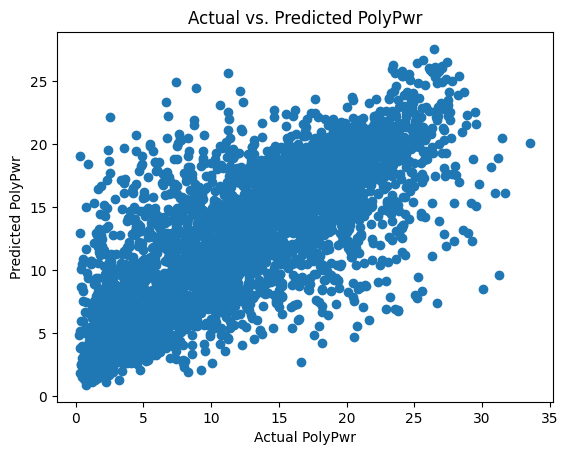

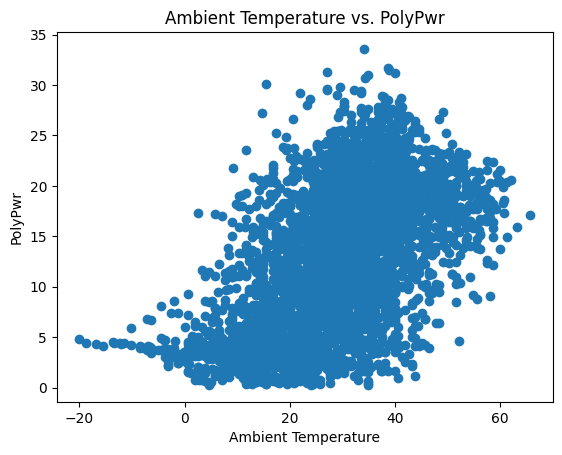

In [ ]:
import matplotlib.pyplot as plt

   # Actual vs. Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual PolyPwr")
plt.ylabel("Predicted PolyPwr")
plt.title("Actual vs. Predicted PolyPwr")
plt.show()

# Feature vs. Target (example with AmbientTemp)
plt.scatter(X_test['AmbientTemp'], y_test)
plt.xlabel("Ambient Temperature")
plt.ylabel("PolyPwr")
plt.title("Ambient Temperature vs. PolyPwr")
plt.show()

In [ ]:
#describe x_test
X_test.describe()

,Latitude,Longitude,Altitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,38.093295,-108.634481,797.081967,37.234344,29.080142,10.395106,9.701782,926.069470,512.760513,0.208838,0.229983,0.388216,0.172963
std,6.308218,16.333767,766.601758,23.787258,12.363701,6.428385,1.368136,84.910521,303.468816,0.406527,0.420872,0.487402,0.378260
min,20.890000,-156.440000,1.000000,0.000000,-19.981770,0.000000,0.000000,781.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.160000,-117.260000,2.000000,17.840580,21.373980,6.000000,10.000000,848.100000,130.000000,0.000000,0.000000,0.000000,0.000000
50%,38.820000,-111.180000,458.000000,33.526610,30.253910,9.000000,10.000000,960.500000,722.000000,0.000000,0.000000,0.000000,0.000000
75%,41.150000,-104.710000,1370.000000,52.478030,37.394100,14.000000,10.000000,1009.200000,722.000000,0.000000,0.000000,1.000000,0.000000
max,47.520000,-80.110000,1947.000000,99.987790,65.738370,49.000000,10.000000,1029.500000,722.000000,1.000000,1.000000,1.000000,1.000000


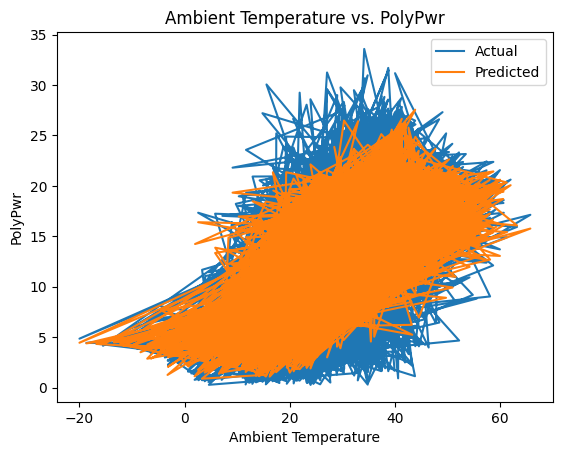

In [ ]:
plt.plot(X_test['AmbientTemp'], y_test, label='Actual')
plt
plt.plot(X_test['AmbientTemp'], y_pred, label='Predicted')
plt.xlabel('Ambient Temperature')
plt.ylabel('PolyPwr')
plt.title('Ambient Temperature vs. PolyPwr')
plt.legend()
plt.show()

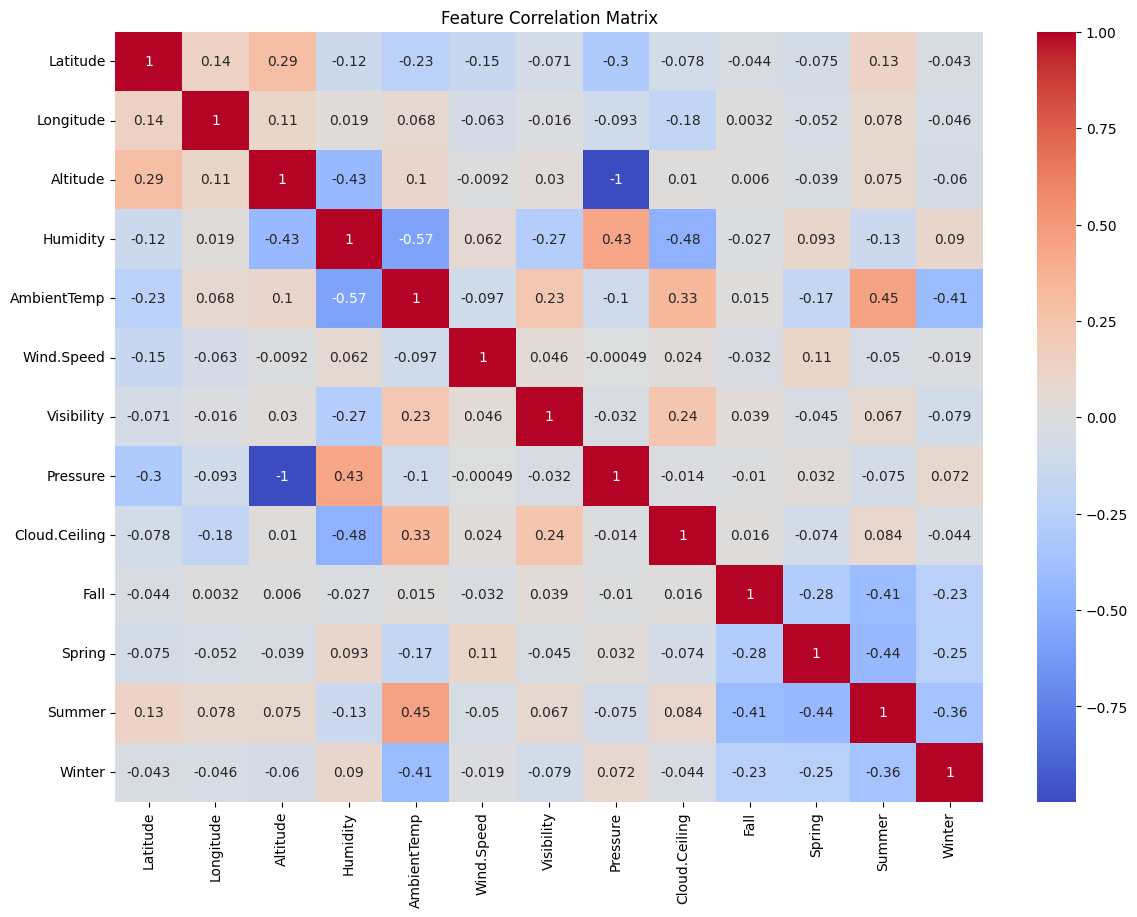

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")

plt.show()
# corr_matrix = df.corr()  # Calculate correlation matrix for the entire dataset
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title("Feature Correlation Matrix")
# plt.show()

In [ ]:
X_train.describe()

,Latitude,Longitude,Altitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
count,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000,16836.000000
mean,38.243955,-108.583477,799.284094,37.093840,29.336361,10.299121,9.699644,925.913566,516.768354,0.209551,0.228083,0.390473,0.171894
std,6.327469,16.372180,771.720482,23.832564,12.367436,6.374193,1.347912,85.294259,301.514471,0.407000,0.419609,0.487871,0.377299
min,20.890000,-156.440000,1.000000,0.000000,-18.670040,0.000000,0.000000,782.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.160000,-117.260000,2.000000,17.456050,21.930390,6.000000,10.000000,844.225000,140.000000,0.000000,0.000000,0.000000,0.000000
50%,38.950000,-111.180000,458.000000,33.041380,30.296710,9.000000,10.000000,961.100000,722.000000,0.000000,0.000000,0.000000,0.000000
75%,41.150000,-104.710000,1370.000000,52.600100,37.482850,14.000000,10.000000,1008.900000,722.000000,0.000000,0.000000,1.000000,0.000000
max,47.520000,-80.110000,1947.000000,99.987790,64.502180,49.000000,10.000000,1029.500000,722.000000,1.000000,1.000000,1.000000,1.000000


Daily Energy Generation (kWh) ≈ PV Power (kW) × Peak Sun Hours × Derate Factor


In [ ]:
import pandas as pd
import numpy as np

sample_input = pd.DataFrame({
    'Latitude': [34.05, 34.06],
    'Longitude': [-118.24, -118.25],
    'Altitude': [100, 105],
    'Humidity': [60, 65],
    'AmbientTemp': [25, 26],
    'Wind.Speed': [5, 6],
    'Visibility': [10, 11],
    'Pressure': [1010, 1012],
    'Cloud.Ceiling': [1000,1000],
    'Fall': [0, 0],
    'Spring': [1, 1],
    'Summer': [0, 0],
    'Winter': [0, 0]
})

y_pred_sample = rf_model.predict(sample_input)

print(f"Predictions for the sample input: {y_pred_sample}")


Predictions for the sample input: [10.2066958 11.6145867]
